## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [186]:
# your code here
data = pd.read_csv('german_credit.txt')
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good


In [4]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [5]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [6]:
# your code here
data.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [7]:
# explore categorical features first

categorical_col = data.columns[data.dtypes == 'object']
print('categorical_col are ', categorical_col)
print(len(categorical_col))

categorical_col are  Index(['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
       'installment_rate', 'personal_status_sex', 'other_debtors',
       'present_residence', 'property', 'other_installment_plans', 'housing',
       'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker',
       'credit_risk'],
      dtype='object')
18


In [8]:
# the rest is numerical

numerical_col = data.columns[data.dtypes != 'object']
print('numerical_col are ', numerical_col)
print(len(numerical_col))

numerical_col are  Index(['duration', 'amount', 'age'], dtype='object')
3


In [11]:
data.dtypes

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
personal_status_sex        object
other_debtors              object
present_residence          object
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits             object
job                        object
people_liable              object
telephone                  object
foreign_worker             object
credit_risk                object
dtype: object

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [14]:
# your code here
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [ ]:
df_full['math score'][(df_full['math score'] >= passmark)].count()/df.shape[0]

In [24]:
# your code here
data['housing'][(data['age'] < 30) & (data['housing']== 'rent')].count()/data.shape[0] * 100

24.6

In [25]:
data['housing'][(data['age'] > 40) & (data['housing']=='rent')].count()/data.shape[0] * 100

18.5

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [30]:
# your code here
data['number_credits'][(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '5-Apr') | (
    data['number_credits'] == '>= 6'))]

213    5-Apr
Name: number_credits, dtype: object

In [29]:
data['number_credits'].unique()
# that's strange, so let's assume 5 and >=6 are what for need for the condition >3

array(['1', '3-Feb', '5-Apr', '>= 6'], dtype=object)

### Задание 6 (1 балл)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

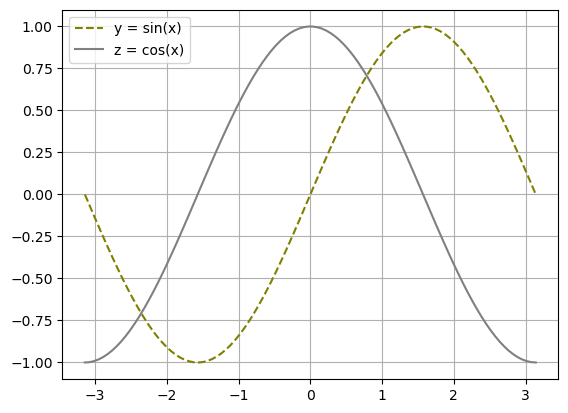

In [45]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)
z = np.cos(x)
plt.plot(x, y,'olive', linestyle='--') 
plt.plot(x, z, 'grey')
plt.legend(['y = sin(x)', 'z = cos(x)'])
plt.grid()

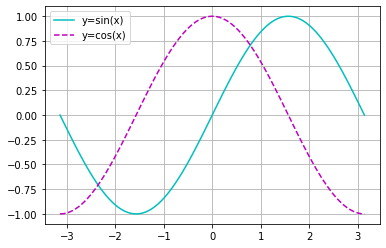

In [8]:
# your code here

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [66]:
status_countg = pd.DataFrame(data[data['credit_risk'] == "good"].status.value_counts())
status_countb = pd.DataFrame(data[data['credit_risk'] == "bad"].status.value_counts())
df = status_countb.join(status_countg, lsuffix='_good', rsuffix='_bad')
df.reset_index(inplace=True)
df

,index,status_good,status_bad
0,no checking account,135,139
1,... < 0 DM,105,164
2,... >= 200 DM / salary for at least 1 year,46,348
3,0<= ... < 200 DM,14,49


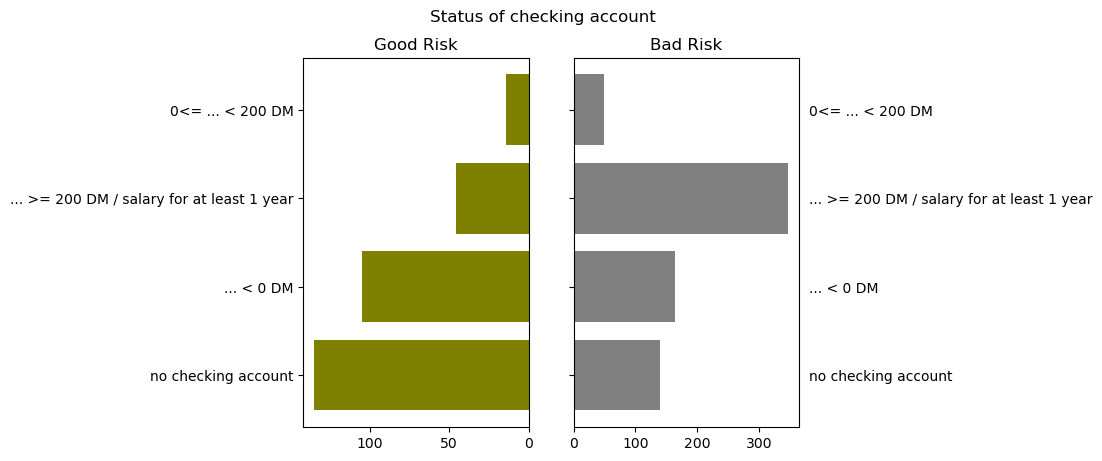

In [73]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.barh(y = df['index'], width = df['status_good'], color ='olive')
ax2.barh(y = df['index'], width = df['status_bad'], color = 'grey')

fig.suptitle('Status of checking account')
ax1.set_title('Good Risk')
ax2.set_title('Bad Risk')

ax1.invert_xaxis() # to make them mirror each other
ax2.yaxis.set_tick_params(labelleft=False, labelright=True) # to annotate on the right, not left

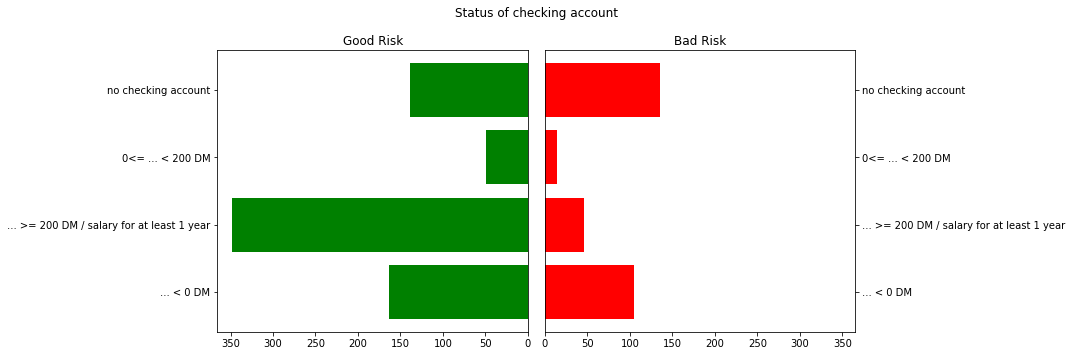

In [9]:
# your code here

### Задание 8  (0.5 балла)

In [91]:
import seaborn as sns
# multiple{“layer”, “dodge”, “stack”, “fill”} - how two types of data are portrayed

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

<AxesSubplot:xlabel='savings', ylabel='Count'>

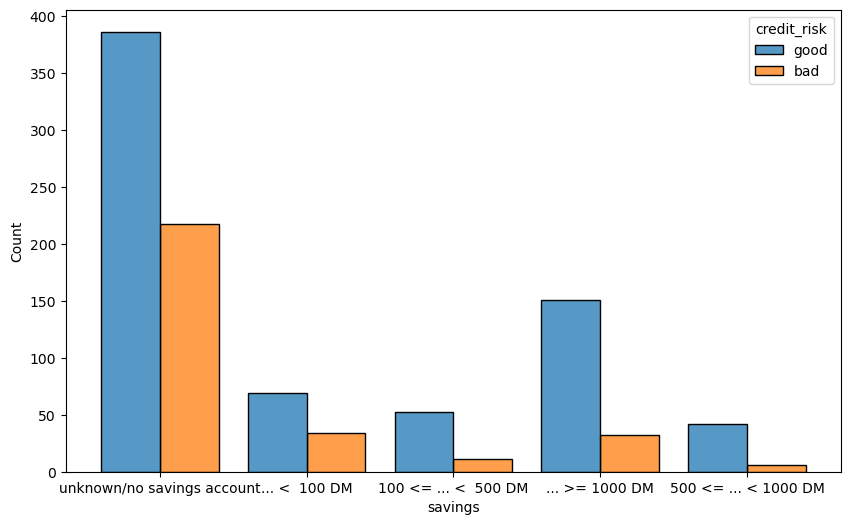

In [105]:
sns.histplot(data=data, x='savings', hue='credit_risk', multiple="dodge", shrink=.8)

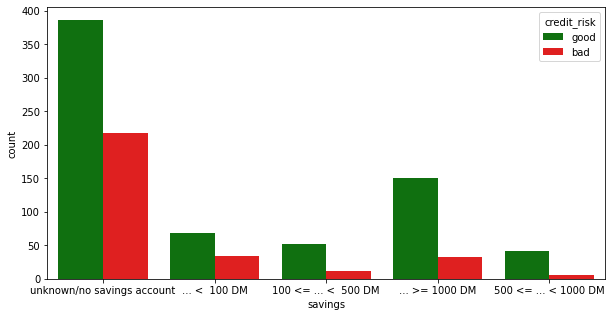

In [11]:
# your code here

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

<AxesSubplot:xlabel='savings', ylabel='age'>

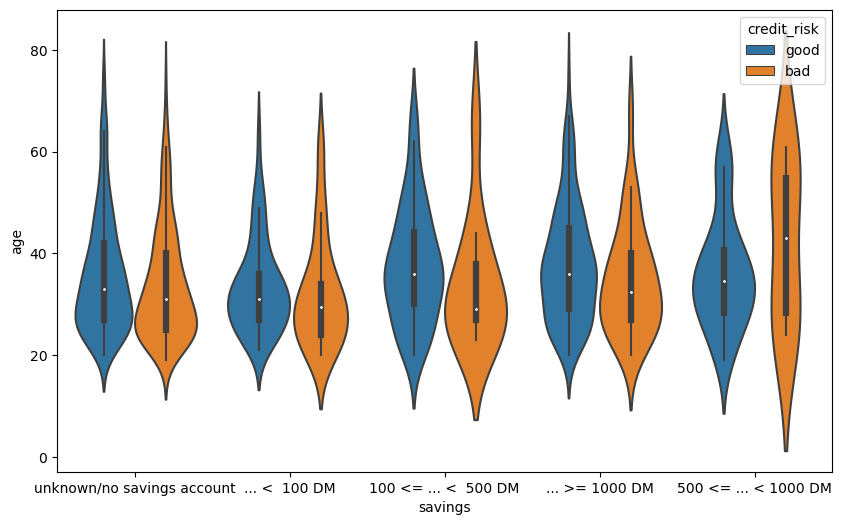

In [106]:
sns.violinplot(data=data, x="savings", y="age", hue="credit_risk")

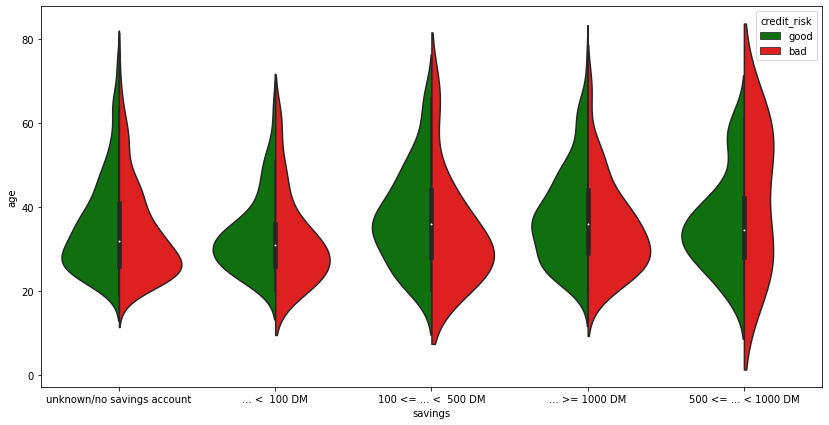

In [12]:
# your code here

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

In [119]:
gb = data.credit_risk.value_counts().index
gb

Index(['good', 'bad'], dtype='object')

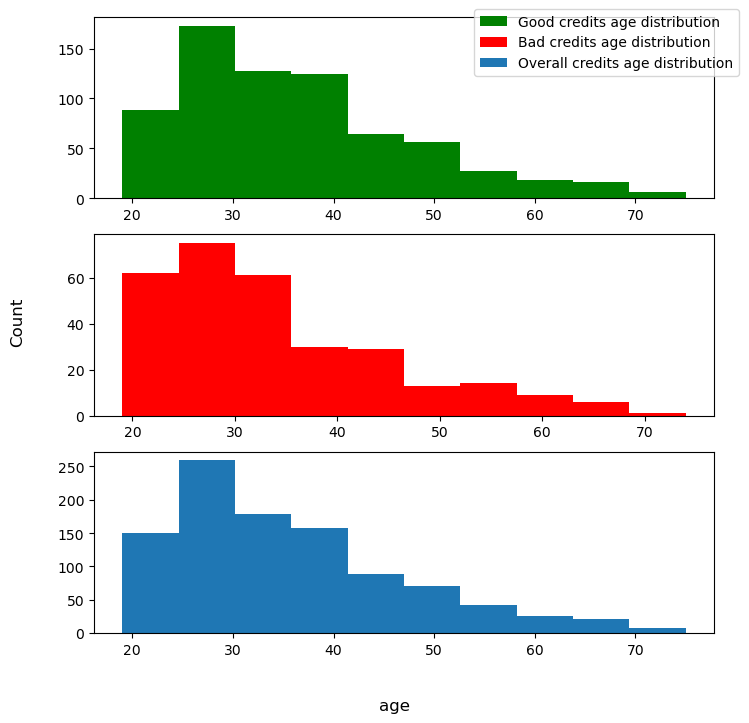

In [148]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

ax1.hist(data[data['credit_risk'] == "good"]['age'], label = 'Good credits age distribution', color='green');
ax2.hist(data[data['credit_risk'] == "bad"]['age'], label = 'Bad credits age distribution', color='red');
ax3.hist(data['age'], label = 'Overall credits age distribution');

fig.legend(bbox_to_anchor=(0.6, 0.890), loc='upper left',  borderaxespad=0.)
fig.supxlabel('age');
fig.supylabel('Count');

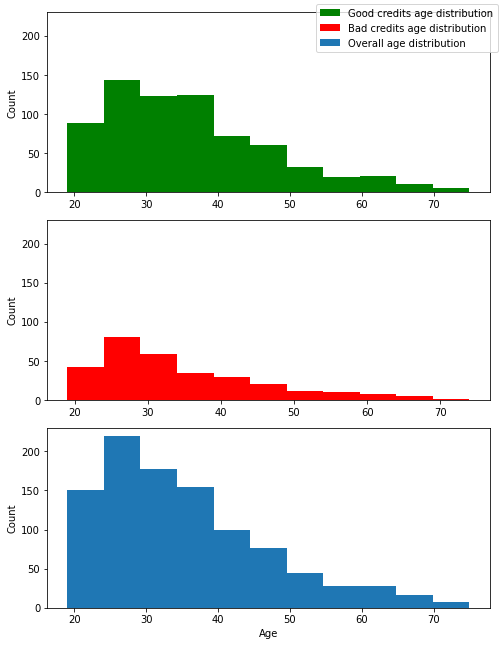

In [13]:
# your code here

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

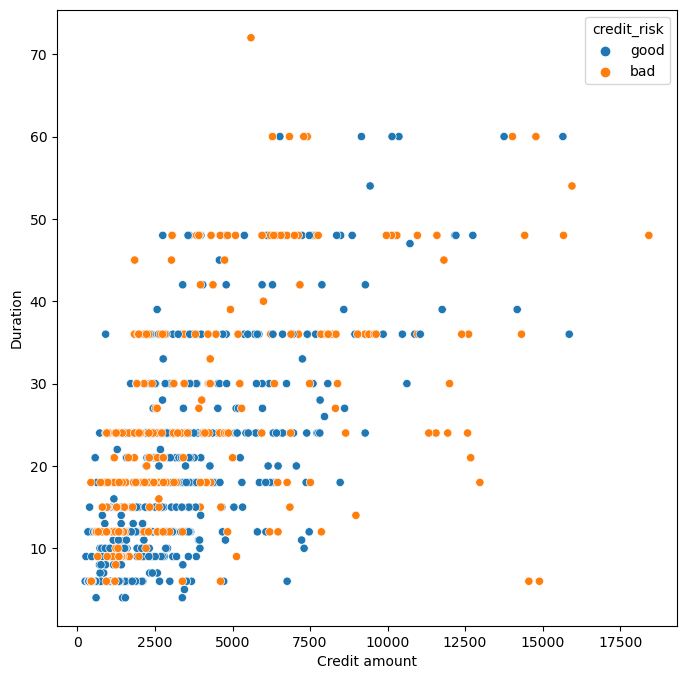

In [165]:
sns.scatterplot(data=data, x='amount', y='duration', hue = 'credit_risk')
plt.xlabel('Credit amount');
plt.ylabel('Duration');

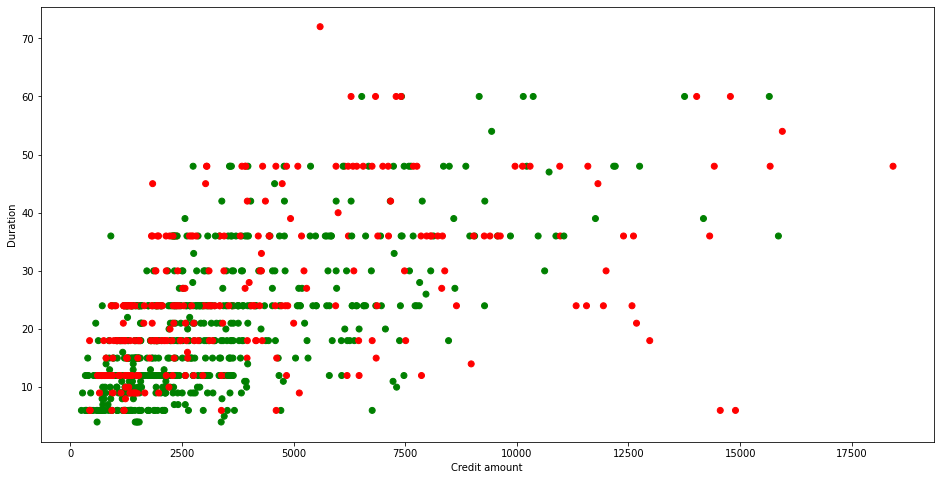

In [21]:
# your code here

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

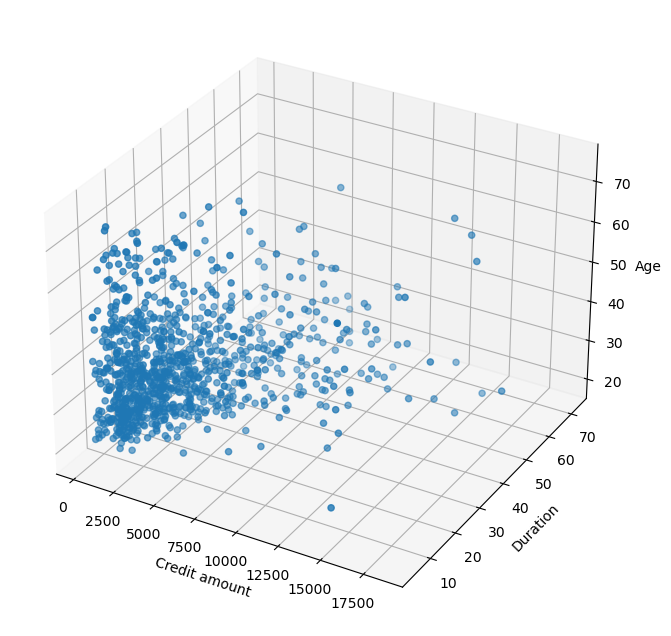

In [176]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = data['amount']
ys = data['duration']
zs = data['age']
ax.scatter(xs, ys, zs)

ax.set_xlabel('Credit amount');
ax.set_ylabel('Duration');
ax.set_zlabel('Age');

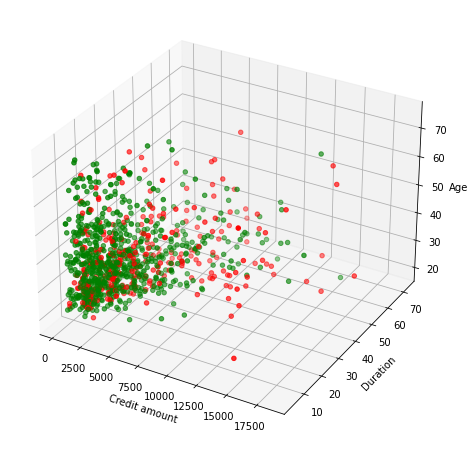

In [15]:
# your code here

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [187]:
# your code here
data.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [188]:
categorical_col = data.columns[data.dtypes == 'object']
print('categorical_col are ', categorical_col)
print(len(categorical_col))

categorical_col are  Index(['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
       'installment_rate', 'personal_status_sex', 'other_debtors',
       'present_residence', 'property', 'other_installment_plans', 'housing',
       'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker',
       'credit_risk'],
      dtype='object')
18


In [189]:
data.drop(categorical_col, axis=1, inplace=True)

In [190]:
data.columns

Index(['duration', 'amount', 'age'], dtype='object')

In [191]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(data['duration'])
# Drop column B as it is now encoded
data = data.drop('duration',axis = 1)
# Join the encoded df
data = data.join(one_hot)
data

,amount,age,4,5,6,7,8,9,10,11,...,36,39,40,42,45,47,48,54,60,72
0,1049,21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2799,36,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,841,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2122,39,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2171,38,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1987,21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,2303,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,12680,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,6468,52,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(data['amount'])
# Drop column B as it is now encoded
data = data.drop('amount',axis = 1)
# Join the encoded df
data = data.join(one_hot)
data

,age,4,5,6,7,8,9,10,11,12,...,14318,14421,14555,14782,14896,15653,15672,15857,15945,18424
0,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,39,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,38,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,52,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [193]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(data['age'])
# Drop column B as it is now encoded
data = data.drop('age',axis = 1)
# Join the encoded df
data = data.merge(one_hot)
data

,4,5,6,7,8,9,10,11,12,13,...,62,63,64,65,66,67,68,70,74,75
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
data.columns

Int64Index([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
            ...
            62, 63, 64, 65, 66, 67, 68, 70, 74, 75],
           dtype='int64', length=991)

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [17]:
def predict(Xtest: np.array) -> np.array:
    # your code here

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))